# P2 - 泰坦尼克号生存数据分析

## 项目描述：
### 数据情况
本项目所使用的数据包括泰坦尼克号上 2224 名乘客和船员中 891 名的人口学数据和乘客基本信息。
1. [数据来源](http://t.cn/RIODHCu)
2. [数据集描述](http://t.cn/R2sHf1S)

### 分析目标
希望通过简单的数据分析，解释一下问题：
1. 有哪些因素会让影响乘客的生还率？
2. 这些因素分别会对生还率造成什么样的影响？
3. 这些因素的影响效果如何？

### 猜想
影响乘客生还率的各个可能因素及猜想：

1. 经济地位：社会经济地位越高，越有可能生还。可以从三个变量考虑：Pclass, Fare, Cabin
2. 性别：女性比男性的生还率高。变量：Sex
3. 年龄：年龄越大，生还可能性越小。变量：Age
4. 同伴：同行人数越多，生还可能性越大。变量：SibSp, Parch
5. 港口：不同的港口生还率可能不一样，需要进一步探索。变量: Embarked


### 参考资料

## 1. 数据准备

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
titanic_df = pd.read_csv("titanic-data.csv")
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


上表显示了数据集中数值型变量的一般统计量数据。

In [5]:
'Titanic数据集一共有{}条成员记录，有{}名成员生还，总体生还率是{}%'.format(titanic_df['PassengerId'].count(),
                                                titanic_df['Survived'].sum(),
                                                round((100*titanic_df['Survived'].sum())/titanic_df['Survived'].count(),2))

'Titanic数据集一共有891条成员记录，有342名成员生还，总体生还率是38.38%'

### 调查数据中出现的问题
在上文中展示的数据基本信息中，数据集的信息记录相对完整，可以进行初步探索，有现异常情况则可在每项分析前特别解决。在Age一栏只有714条记录，关于这部分的数据调查将在Age变量分析之前进行。

## 2. 变量分析

### 2.1 一维变量分析

#### 2.1.1 生还状况

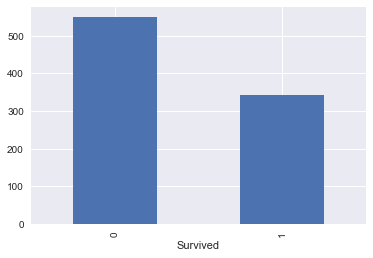

In [6]:
titanic_df.groupby('Survived')['Survived'].count().plot(kind='bar')

可以看出，生存下来的乘客明显少于未生存下来的乘客。

#### 2.1.2 社会经济地位分布

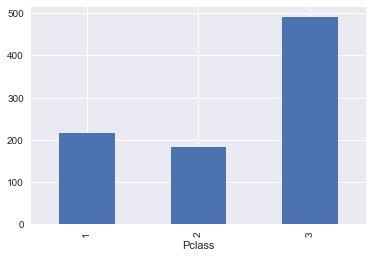

In [7]:
Pclass_ct=(titanic_df.groupby('Pclass')['PassengerId'].count()) #以Pclass为分组依据，对数据集进行分组。
Pclass_ct.plot(kind='bar') #对分组结果绘图

In [8]:
Pclass_ct

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64

船上三等类别的乘客人数最多，有491人，二等类别乘客最少，只有184人。

#### 2.1.3 性别分布

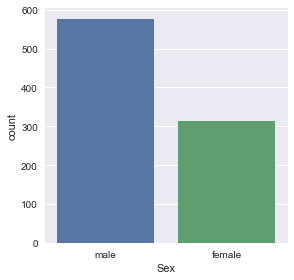

In [9]:
sns.factorplot('Sex',data=titanic_df,kind='count')

船内男性乘客多于女性乘客。

#### 2.1.4 年龄分布

之前提到有177条乘客年龄记录缺失，我们查看一下这部分记录。

In [10]:
titanic_df[titanic_df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C


关于这部分缺失的数据，最直接的处理方法是在分析过程中直接去除。而在绘图过程中，去除NAN是自动进行的。值得注意的是，此处需要进一步探索一部分缺失数据的背景，以排除大批具有相似特征的年龄数据缺失的可能性。

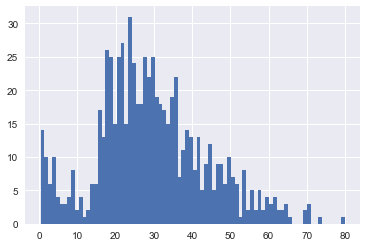

In [11]:
titanic_df['Age'].hist(bins=80)

船内乘客年龄在大于10的部分接近正态分布。我们可以计算一些年龄的集中趋势。

In [15]:
print("均值",titanic_df['Age'].mean())
print("中位数",titanic_df['Age'].median())
print("最大值",titanic_df['Age'].max())
print("最小值",titanic_df['Age'].min())
print("标准差",titanic_df['Age'].std())

均值 29.69911764705882
中位数 28.0
最大值 80.0
最小值 0.42
标准差 14.526497332334044


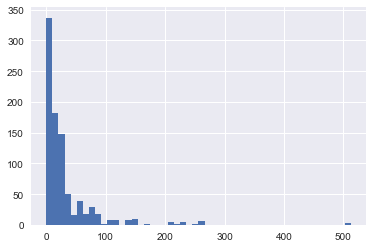

In [32]:
#将船票价格分布
titanic_df['Fare'].hist(bins=50)

票价-数量分布图，低价位的船票数量高度集中，如若要进行分组，按等距分组可能不是一个便于观察的好选择。

### 2.2 二维变量分析

#### 2.2.1 经济地位如何影响生还率？

猜想反应经济地位的因素包括Pclass, Fare, Cabin, Embarked，首先探索这些变量之间的内部关系。

In [251]:
titanic_df.groupby(titanic_df['Embarked'])['PassengerId'].count()

Embarked
C    168
Q     77
S    644
Name: PassengerId, dtype: int64

[(0, 200)]

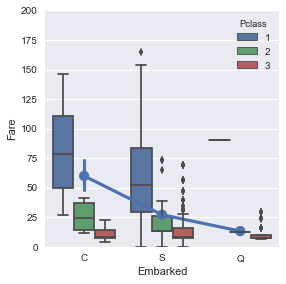

In [234]:
P1 = sns.factorplot(x='Embarked',y='Fare',data=titanic_df, order=["C","S","Q"])
P2 = sns.boxplot(x='Embarked', y='Fare', hue='Pclass', data=titanic_df,order=["C","S","Q"])
P2.set(ylim=(0,200))

总体上，C舱的票价水平高于S舱，高于Q舱；一等类别乘客高于二等、三等。

In [192]:
#定义生还率计算函数
def survival_rate(data):
    return data.sum()/data.count()

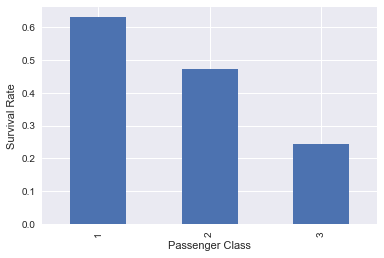

In [195]:
#按Pclass进行分组，提取Survived列，再计算生还比率
Pclass_group=titanic_df.groupby('Pclass')['Survived']
Pclass_group_rate=Pclass_group.apply(survival_rate)
Pclass_group_rate.plot(kind='bar')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

In [17]:
Pclass_gp.head()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

从上图可观察得，社会经济地位是影响生还率的重要因素。经济地位越高，生还的可能性越高。一等乘客拥有63%的生还率，而三等乘客只有24%左右。

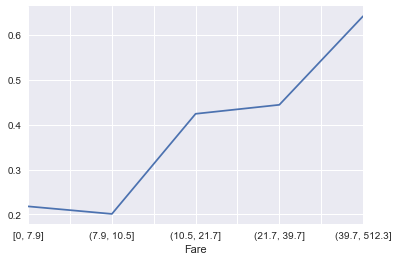

In [198]:
#将船票价格按照quantile分组
Fare_group = titanic_df.groupby(pd.qcut(titanic_df['Fare'],5, precision=0))['Survived']
Fare_group_rate=Fare_group.apply(survival_rate)
Fare_group_rate.plot()

从船票价格分布图来看，我们可以尝试按照价格比例分为5组，再计算每一组内的生还率，可以观察得，价格越高，生还率越高。

In [200]:
# 观察舱位对生还率的影响时，首先要对数据进行适当的转化和整理，提取代表舱位类别的首字母
def cabin_class(data):
    return str(data)[0]
titanic_df['Cabin_class']=titanic_df['Cabin'].apply(cabin_class)
cabin_group=titanic_df.groupby(titanic_df['Cabin_class'])['Survived']
cabin_group_rate=cabin_group.apply(survival_rate)
print(cabin_group.count())
print("")
print(cabin_group_rate)

Cabin_class
A     15
B     47
C     59
D     33
E     32
F     13
G      4
T      1
n    687
Name: Survived, dtype: int64

Cabin_class
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
T    0.000000
n    0.299854
Name: Survived, dtype: float64


In [ ]:
T舱位似乎是一个异常值。

In [ ]:
# 寻找异常值的列
a=0
for i in titanic_df['Cabin']:
    if str(i)[0]=='T':
        print(titanic_df.loc[a])
    a=a+1

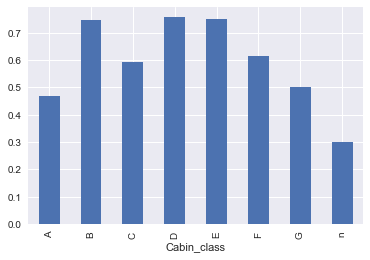

In [201]:
# 排除异常值后的柱状图
cabin_group_rate[["A","B","C","D","E","F","G","n"]].plot(kind='bar')

有舱位的乘客生还率高于无舱位的乘客，而在各类有舱位的乘客中，B,D,E类舱位生还率最高。

#### 2.2.2 性别对生还率有何影响？

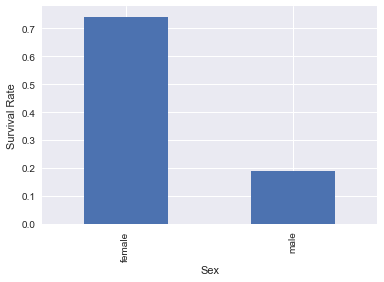

In [205]:
Sex_group=titanic_df.groupby('Sex')['Survived']
Sex_group_rate=Sex_group.apply(survival_rate)
Sex_group_rate.plot(kind='bar')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')

In [207]:
Sex_group_rate

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [ ]:
Sex_group_rate.plot(kind='bar')

性别是影响某位乘客能否生还的重要因素。女性拥有超过74%的生还率，而男性却只有18.9%。

#### 2.2.3年龄对生还率的影响情况如何？

In [237]:
#将NAN部分数据清除
Aged = titanic_df[['Survived', 'Age']].dropna()
#对年龄进行分组
Grouped_Age=Aged.groupby(pd.cut(Aged['Age'],8,labels=["0~10","10~20","20~30","30~40","40~50","50~60","60~70","70~80"]))
#计算分组后的生还率
Age_group=Grouped_Age['Survived']
Age_group_rate = Age_group.apply(survival_rate)
Age_group_rate

Age
0~10     0.593750
10~20    0.382609
20~30    0.365217
30~40    0.445161
40~50    0.383721
50~60    0.404762
60~70    0.235294
70~80    0.200000
Name: Survived, dtype: float64

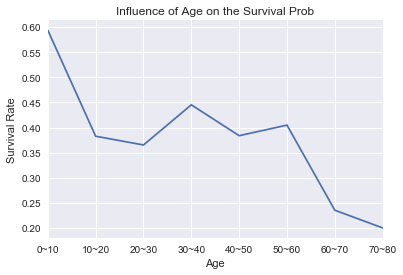

In [238]:
Age_group_rate.plot()
plt.xlabel("Age") 
plt.ylabel("Survival Rate") 
plt.title("Influence of Age on the Survival Prob")

整体上来看，生还率随着年龄的增加而下降。

#### 2.2.4 随行旅伴的数量如何影响生还率？

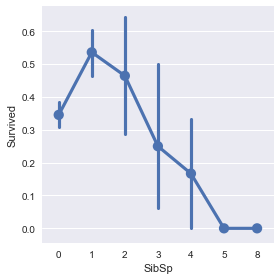

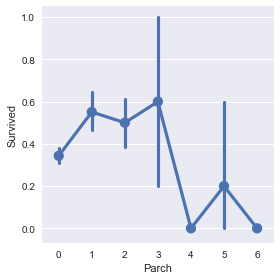

In [263]:
sns.factorplot('SibSp','Survived',data=titanic_df)
sns.factorplot('Parch','Survived',data=titanic_df)

SibSp和Parch的影响大致相同，将两者统一为Compa变量，意味同伴人数

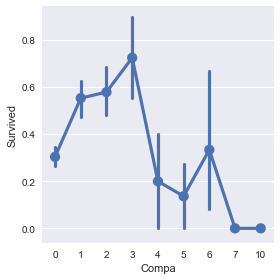

In [265]:
titanic_df['Compa']=titanic_df['SibSp'] + titanic_df['Parch']
sns.factorplot('Compa','Survived',data=titanic_df)

观察上图可知，当同伴人数为1~3人时，生存率会高于独身情况，而当同伴人数多于3人时，生还率反而很低。

### 2.3多维变量分析

In [239]:
Sex_Pclass_group = titanic_df.groupby(['Sex','Pclass'])['Survived']
Sex_Pclass_group_rate = Sex_Pclass_group.apply(survival_rate)
Sex_Pclass_group_rate

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64

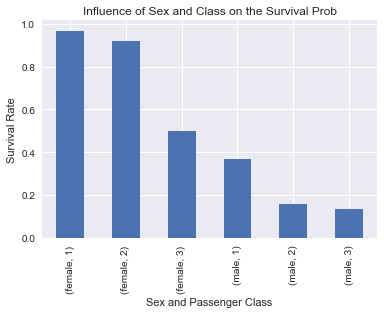

In [240]:
Sex_Pclass_group_rate.plot(kind='bar')
plt.xlabel("Sex and Passenger Class") 
plt.ylabel("Survival Rate") 
plt.title("Influence of Sex and Class on the Survival Prob")
plt.show()

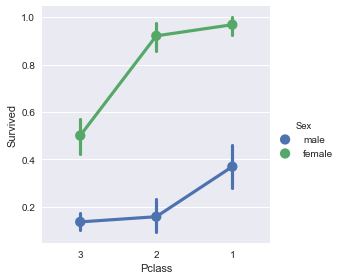

In [241]:
#与上图表现内容相似，一种更简单直观的绘图方式。
sns.factorplot('Pclass','Survived',hue='Sex',data=titanic_df, order=[3,2,1])

从上图我们可以看出，性别影响大于社会经济地位。即使是第三阶级的女性生还率也还是高于第一阶级男性的生还率。

### 3.结论

实际数据分析结果与猜想基本吻合。

1. 经济地位：经济地位越高，越有可能生还。经济地位可以通过四个因素反应，座位等级、船票价格、是否有舱位以及登船港口。
    a. 座位等级越高，生还率越高；
    b. 船票价格越高，生还率越高；
    c. 有舱位比无舱位的生还率高；
    d. C港登船乘客的生还率高于S港,Q港；
2. 性别：女性比男性的生还率高。
3. 年龄：年龄越大，生还可能性越小。
4. 同伴：同行人数在1~3人时，生还可能性大。

根据以上结论，可以模糊得出一个有高生还率的乘客：一位0~10岁的女性，拥有一等座，随同3人，船票高于40，D舱，在Cherbourg登船。

### 4. 不足
1. 结论中，“0~10岁女性”的群体分类较为不合理，常理来说小孩被救援的可能性较少会受到性别影响。因此在进行人群个人特征分类时，可以考虑将年龄与性别相结合，分为小孩（0~16岁）、女性、男性、老人（60岁以上），这样也许更合乎常理。
2. 177条年龄缺失记录有可能具有某种年龄特征，这种缺失有可能对分析结果造成影响，分析过程尚未排除这种影响存在的可能性。
3. 在分析同伴人数时，在同班人数较高的区间，由于缺乏足够多的数据，结论存在较大的偶然性。
4. 尚未给出各项因素对生还率的影响权重，分析结论依然较为笼统，可以尝试建立模型来精确预测生还率。
5. 在图形可视化上表现单一，需要尝试更多的图形来表现数据特征。